In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing New\cleaned_gurgaon_properties_v2.parquet')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.head(1)

,Sector,Price,Built Up Area,Bedroom,Bathroom,Balcony,Others,Pooja Room,Servant Room,Store Room,Study Room,Floor Num,Total Floor,Facing_North,Facing_North-East,Facing_North-West,Facing_South,Facing_South-East,Facing_South-West,Facing_Unknown,Facing_West,Property Age,Overlooking_Club,Overlooking_Lake facing,Overlooking_Main Road,Overlooking_Others,Overlooking_Park,Overlooking_Pool,NearbyPlace_Business,NearbyPlace_Education,NearbyPlace_Financial,NearbyPlace_Healthcare,NearbyPlace_Leisure,NearbyPlace_Religious,NearbyPlace_Residentail,NearbyPlace_Shopping,NearbyPlace_Transport,Property Ownership,Furnishing,Power Backup,Covered_Parking,Open_Parking,Total Parking,Rating,Sector_encoded
0,Sector 81,1.05,1031,2,2,2,1,0,0,0,0,10,14,0,0,0,0,0,0,0,0,3,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,1,2,1,0,1,3.6,2.7


In [5]:
numerical_df = df.select_dtypes(include= ['int8', 'int64', 'float32', 'float32'])

In [6]:
corr_matrix = numerical_df.corr()

plt.figure(figsize= (30, 22))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.savefig(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Misc\correlation_heatmap.png')
plt.close()
print(r"Heatmap saved to 'Misc\correlation_heatmap.png'")

Heatmap saved to 'Misc\correlation_heatmap.png'


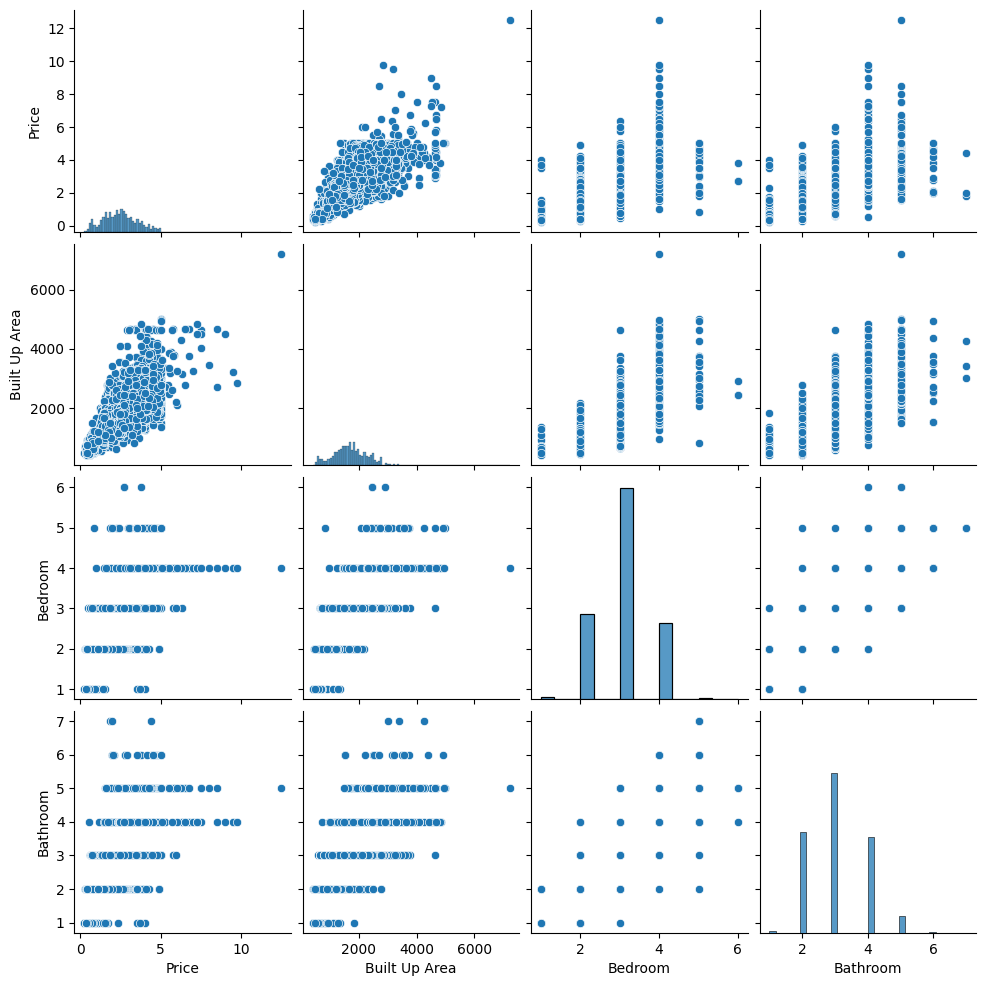

In [7]:
sns.pairplot(df[['Price', 'Built Up Area', 'Bedroom', 'Bathroom']])
plt.show()

In [8]:
import re

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')

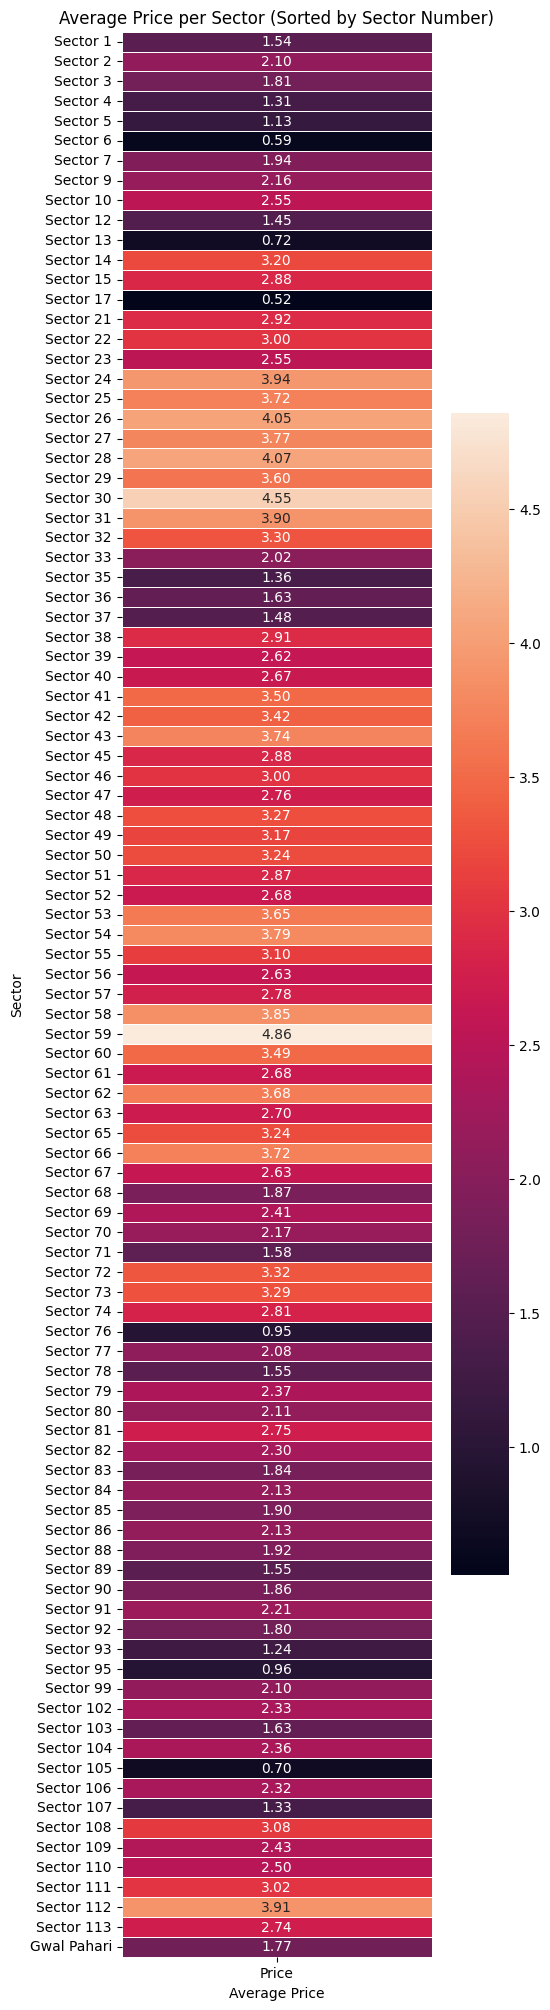

In [9]:
avg_price_per_sector = df.groupby('Sector')['Price'].mean().reset_index()

avg_price_per_sector['Sector_number'] = avg_price_per_sector['Sector'].apply(extract_sector_number)

avg_price_per_sector_sortby_sector = avg_price_per_sector.sort_values(by= 'Sector_number')

plt.figure(figsize= (5, 25))
sns.heatmap(avg_price_per_sector_sortby_sector.set_index('Sector')[['Price']], annot= True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_7348\3078965336.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_price_per_sqft_per_sector = df.groupby('Sector').apply(lambda x: (x['Price'] * 10000000 / x['Built Up Area']).mean()).reset_index(name='Price per sqft')


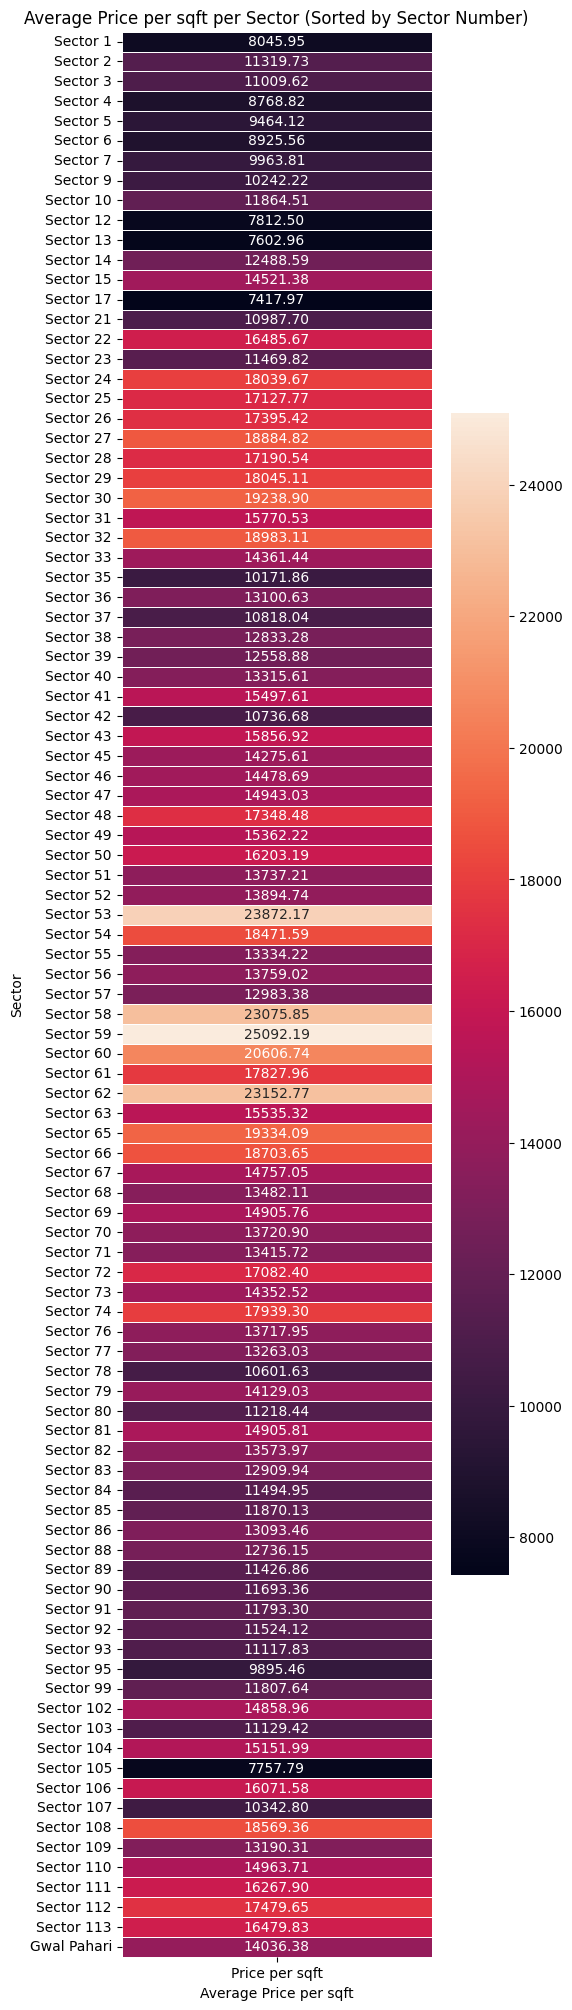

In [10]:
avg_price_per_sqft_per_sector = df.groupby('Sector').apply(lambda x: (x['Price'] * 10000000 / x['Built Up Area']).mean()).reset_index(name='Price per sqft')

avg_price_per_sqft_per_sector['Sector_number'] = avg_price_per_sqft_per_sector['Sector'].apply(extract_sector_number)

avg_price_per_sqft_per_sector_sortby_sector = avg_price_per_sqft_per_sector.sort_values(by= 'Sector_number')

plt.figure(figsize= (5, 25))
sns.heatmap(avg_price_per_sqft_per_sector_sortby_sector.set_index('Sector')[['Price per sqft']], annot= True, fmt=".2f", linewidths=.5)
plt.title('Average Price per sqft per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

<Axes: xlabel='Built Up Area', ylabel='Price'>

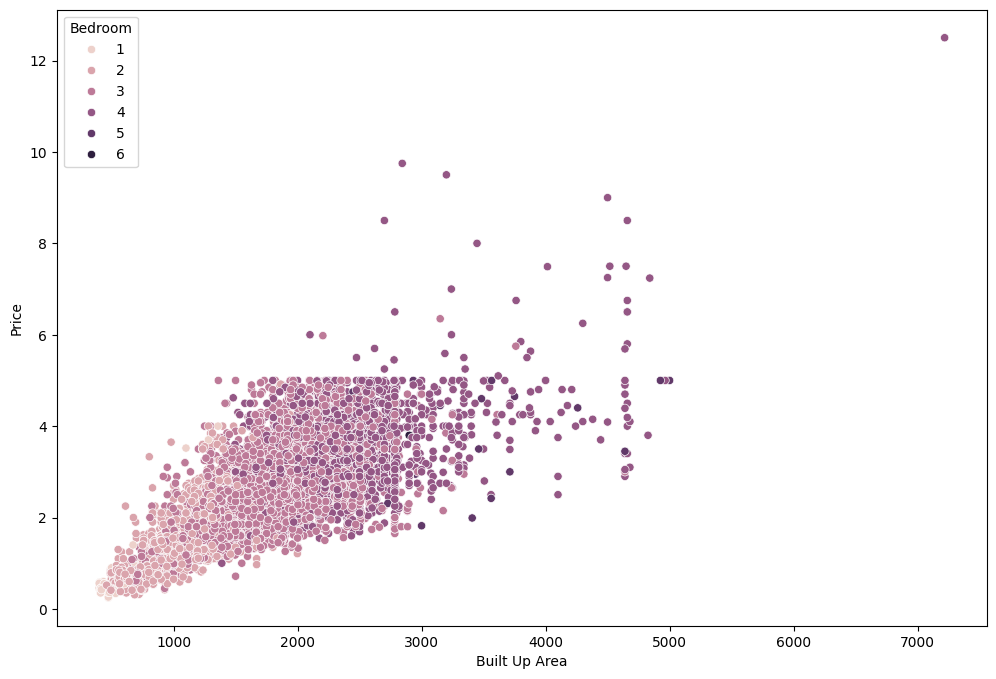

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x= df['Built Up Area'], y= df['Price'], hue= df['Bedroom'])

<Axes: xlabel='Built Up Area', ylabel='Price'>

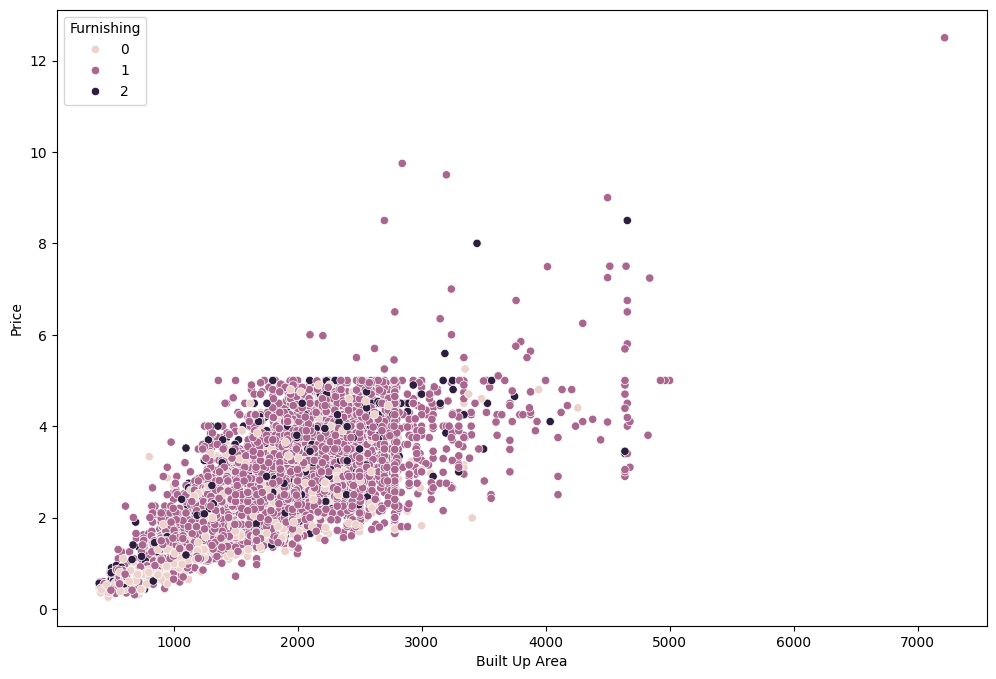

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x= df['Built Up Area'], y= df['Price'], hue= df['Furnishing'])